In [3]:
import pandas as pd

In [8]:
import os
from prepare_data import get_data

catch_path=os.path.join('..','..','db1','catch.csv')
ext_path=os.path.join('..','..','db2','Ext.csv')
ext2_path=os.path.join('..','..','db2','Ext2.csv')

db1, db2 = get_data(catch_path,ext_path,ext2_path)

Prepare df_catch
Prepare df_ext
Prepare df_ext2


UnboundLocalError: local variable 'df_ext2_merged' referenced before assignment

In [ ]:
db1.

In [242]:
df_catch = pd.read_csv(os.path.join('db1','catch.csv'))

In [265]:
df_product = pd.read_csv(os.path.join('db1','product.csv'))

In [ ]:
df_ext = pd.read_csv(os.path.join('db2','Ext.csv'))
df_ext2 = pd.read_csv(os.path.join('db2','Ext2.csv'))

## Preproccessing

#### Catch

In [263]:
df_catch.head()

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own
0,1628,2022-01-01,272,400,31.874,41,2824,961
1,70,2022-01-01,277,886,0.476,1,2414,1281
2,1608,2022-01-01,116,409,26.310,15,3031,1227
3,832,2022-01-01,272,292,9.541,1,1894,1281
4,832,2022-01-01,272,113,0.062,1,1894,1281


Drop unused `permit`

In [273]:
df_db1 = df_catch.drop(columns='permit')

### Ext
Check how many id_ves from df_catch contains in df_ext

In [262]:
df_ext[~(df_ext['id_ves'].isin(df_catch['id_ves'].unique())) & (df_ext['id_ves']!=-1)]

,id_ves,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
44,1579,1195,2022-05-24 00:00:00,6289005,6672408,\N,\N,\N
45,1579,1195,2022-05-24 00:00:00,6289005,8469633,\N,\N,\N
46,1579,1195,2022-05-24 00:00:00,6289005,8605162,\N,\N,\N
47,1579,1195,2022-05-24 00:00:00,6289005,7798565,\N,\N,\N
48,1599,1195,2022-05-24 00:00:00,6290078,7952695,\N,\N,\N
...,...,...,...,...,...,...,...,...
3260721,1636,1144,2020-12-31 00:00:00,6290871,7971576,\N,\N,\N
3260730,1466,938,2020-12-31 00:00:00,6295910,8909315,\N,\N,\N
3260731,1466,938,2020-12-31 00:00:00,6295910,8375262,\N,\N,\N
3260742,1363,1011,2020-12-31 00:00:00,6292142,6553285,\N,\N,\N


It's many. This why make different DBSCAN for `df_catch` only, `df_ext` only and compare `df_catch` and `df_ext`

#### Remove duplicates

In [241]:
df_ext[df_ext['id_ves']==-1]

,id_ves,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
15313,-1,-1,2022-04-20 02:38:01,6294403,6834025,9518351,\N,Камчатский край
15314,-1,-1,2022-04-20 02:38:01,6294403,8596508,9518351,\N,Камчатский край
15315,-1,-1,2022-04-20 02:37:57,6295967,9079011,9516052,\N,Приморский край
15316,-1,-1,2022-04-20 02:37:34,6295967,8489049,9516052,\N,Приморский край
15317,-1,-1,2022-04-20 02:37:04,6295967,8183544,9516052,\N,Приморский край
...,...,...,...,...,...,...,...,...
3112990,-1,-1,2022-01-02 00:02:35,6294690,7601012,9515018,2022-01-02 00:00:00,г. Москва
3112991,-1,-1,2022-01-02 00:02:35,6294690,8450974,9515018,2022-01-02 00:00:00,г. Москва
3112992,-1,-1,2022-01-02 00:02:35,6294690,6391908,9515018,2022-01-02 00:00:00,г. Москва
3112993,-1,-1,2022-01-02 00:02:19,6294190,7006117,9513603,2022-01-02 00:00:00,Республика Хакасия


In [168]:
df_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260798 entries, 0 to 3260797
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id_ves          int64 
 1   id_own          int64 
 2   date_fishery    object
 3   numPart         object
 4   id_Plat         int64 
 5   id_vsd          int64 
 6   Name_Plat       object
 7   Product_period  object
 8   Region_Plat     object
dtypes: int64(4), object(5)
memory usage: 223.9+ MB


There just 4 unique values. Let's see them

In [170]:
df_ext[df_ext['numPart']!='\\N']

,id_ves,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
3154783,1290,1156,2021-09-14 00:00:00,1,6296848,6760283,\N,\N,\N
3154784,1290,1156,2021-09-14 00:00:00,1,6296848,8508555,\N,\N,\N
3154785,1290,1156,2021-09-14 00:00:00,3,6296848,9447157,\N,\N,\N
3154786,1290,1156,2021-09-14 00:00:00,2,6296848,7956670,\N,\N,\N
3154787,1290,1156,2021-09-14 00:00:00,3,6296848,8746726,\N,\N,\N
3154788,1322,1023,2021-09-14 00:00:00,3,6294344,6319541,\N,\N,\N
3154789,1322,1023,2021-09-14 00:00:00,1,6294344,8957890,\N,\N,\N
3154790,1322,1023,2021-09-14 00:00:00,3,6294344,9167480,\N,\N,\N
3154791,1322,1023,2021-09-14 00:00:00,3,6294344,8054779,\N,\N,\N
3154792,1322,1023,2021-09-14 00:00:00,2,6294344,9329734,\N,\N,\N


Not intresting. Remove this feature.

In [171]:
df_ext.drop(columns=['numPart'], inplace=True)
df_ext[df_ext['id_vsd'].duplicated()].head(3)

,id_ves,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
54815,1620,996,2022-04-19 00:00:00,6290172,6748647,\N,\N,\N
54816,1657,1175,2022-04-19 00:00:00,6292428,6753918,\N,\N,\N
54817,1531,1011,2022-04-19 00:00:00,6293278,8559213,\N,\N,\N


In [172]:
def count_duplicated(df,id):
    return len(df[df[id].duplicated()])

'%s record is duplicated' % count_duplicated(df_ext,'id_vsd')

'45854 record is duplicated'

We see duplicated values, check what is duplicated records

In [173]:
df_ext[df_ext['id_vsd']==9232550]

,id_ves,id_own,date_fishery,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
1312329,-1,-1,2022-03-07 03:44:45,6289288,9232550,9514518,2022-03-01 00:00:00,Красноярский край


We see that it is same records but with more information. Try remerge same records in one.

In [174]:
df_ext_descr = df_ext[(df_ext['Name_Plat'] != '\\N') | (df_ext['Product_period'] != '\\N') | (df_ext['Region_Plat'] != '\\N')]

Check that in description table not duplicated values

In [175]:
print('In decription table %s records is duplicated' % count_duplicated(df_ext_descr,'id_vsd'))

In decription table 0 records is duplicated


In [176]:
'Unique %s ids' % len(df_ext['id_vsd'].unique())

'Unique 3214944 ids'

Merge tables

In [177]:
df_ext_wo_data=df_ext.drop(df_ext_descr.index)

In [178]:
df_ext_merged = pd.merge(
    pd.DataFrame(df_ext['id_vsd'].unique(), columns=['id_vsd']),
    df_ext_wo_data[['id_vsd','id_own','id_ves','date_fishery','id_Plat']],
    on='id_vsd',
    how="left"
)
len(df_ext_merged)

3214944

In [179]:
df_ext_merged = pd.merge(
    df_ext_merged,
    df_ext_descr[['id_vsd','date_fishery','Name_Plat','Product_period','Region_Plat']],
    on='id_vsd',
    how="left"
)
len(df_ext_merged)

3214944

Fill `date_fishery` from describted table

In [180]:
df_ext_merged.loc[~df_ext_merged['date_fishery_y'].isna(),'date_fishery_x']=df_ext_merged['date_fishery_y']
df_ext_merged.drop(columns='date_fishery_y',inplace=True)
len(df_ext_merged)

3214944

Same work with df_ext2

In [181]:
df_ext2[df_ext2['id_vsd'].duplicated()].head(3)

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
556258,6334548,5445449,-1,пикша свежая,2022-03-21 02:54:35,3,тонна
556259,6306527,5662445,-1,треска,2022-03-21 02:54:34,1,тонна
556260,7080120,5559522,-1,окунь-клювач,2022-03-21 02:54:33,0,тонна


In [182]:
'%s record is duplicated' % count_duplicated(df_ext2,'id_vsd')

'45854 record is duplicated'

In [183]:
df_ext2[df_ext2['id_vsd']==5544870]

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit


Seems that in duplicated records contains round values. We get more descridable records

In [184]:
'Unique %s ids' % len(df_ext2['id_vsd'].unique())

'Unique 3069426 ids'

In [185]:
df_ext2_w_fish_id = df_ext2[df_ext2['id_fish']!=-1]
print('In table with fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))
df_ext2_wo_fish_id = df_ext2.drop(df_ext2_w_fish_id.index)
print('In table without fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))

In table with fish_id 0 records is duplicated
In table without fish_id 0 records is duplicated


In [186]:
df_ext2_wo_fish_id.head()

,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
39891,8753597,3981889,-1,скумбрия холодного копчения,2022-01-14 09:25:25,250,кг
39892,9199246,4568206,-1,икра сельди соленая,2022-01-04 05:16:29,3,кг
39893,8394699,5849836,-1,готовые блюда из рыбы,2022-02-03 15:43:10,2,кг
39894,8375000,6074372,-1,путассу солено-сушеная,2022-03-21 08:49:01,174,кг
39895,9307607,3322017,-1,путассу вяленая,2022-03-21 06:22:35,50,кг


In [187]:
df_ext2_merged = pd.merge(
    pd.DataFrame(df_ext2['id_vsd'].unique(), columns=['id_vsd']),
    df_ext2_w_fish_id[['id_vsd','id_fish','fish','volume','unit','date_vsd']],
    on='id_vsd',
    how="left"
)
len(df_ext2_merged)

3069426

In [188]:
df_ext2_merged = pd.merge(
    df_ext2_merged,
    df_ext2_wo_fish_id[['id_vsd','fish','date_vsd','volume','unit']],
    on='id_vsd',
    how="left"
)
len(df_ext2_merged)

3069426

In [189]:
print('In table without fish_id %s records is duplicated' % count_duplicated(df_ext2_w_fish_id,'id_vsd'))

In table without fish_id 0 records is duplicated


In [190]:
df_ext2_merged[~(df_ext2_merged['volume_x'].isna())].head(3)

,id_vsd,id_fish,fish_x,volume_x,unit_x,date_vsd_x,fish_y,date_vsd_y,volume_y,unit_y
0,7820377,400.0,минтай,75480.0,\N,2022-01-01 00:39:56,NaN,NaN,NaN,NaN
1,9397385,400.0,минтай,62586.0,\N,2022-01-01 01:34:08,NaN,NaN,NaN,NaN
2,8666689,292.0,треска,1155.0,\N,2022-01-01 01:34:11,NaN,NaN,NaN,NaN


Fill na from describe dataset, drop unneccesary columns and fillna -1

In [191]:
if_fish_na = df_ext2_merged['id_fish'].isna()
df_ext2_merged.loc[if_fish_na,'fish_x']=df_ext2_merged['fish_y']
df_ext2_merged.loc[if_fish_na,'volume_x']=df_ext2_merged['volume_y']
df_ext2_merged.loc[if_fish_na,'unit_x']=df_ext2_merged['unit_y']
df_ext2_merged.loc[if_fish_na,'date_vsd_x']=df_ext2_merged['date_vsd_y']
df_ext2_merged=df_ext2_merged.drop(columns=['fish_y','volume_y','unit_y','date_vsd_y'])
len(df_ext2_merged)

3069426

Now try normalize fish and volume

In [192]:
df_ext2_merged['unit_x'].unique()

array(['\\N', 'кг', 'тонна'], dtype=object)

In [193]:
df_ext2_merged.loc[df_ext2_merged['unit_x']=='\\N','volume_x']/=1000
df_ext2_merged.loc[df_ext2_merged['unit_x']=='кг','volume_x']/=1000

In [194]:
fish_class = df_ext2_merged[df_ext2_merged['id_fish']>=0][['id_fish','fish_x']].drop_duplicates()
df_ext2_merged=pd.merge(
    df_ext2_merged,
    fish_class,
    on='fish_x',
    how='left'
)
df_ext2_merged.loc[df_ext2_merged['id_fish_x'].isna(),'id_fish_x']=df_ext2_merged['id_fish_y']
df_ext2_merged.drop(columns='id_fish_y', inplace=True)

In [195]:
top_fish=df_ext2_merged.groupby('fish_x').sum().sort_values('volume_x', ascending=False)

Remove records with zero volume

In [196]:
df_ext2_merged=df_ext2_merged[~(df_ext2_merged['fish_x'].isin(top_fish[top_fish['volume_x']==0].index))]

In [197]:
top_fish[:10]
# todo classify fish by name

,id_vsd,id_fish_x,volume_x
fish_x,,,
минтай,442513491360,22391600.0,985755865.0
треска,464203028150,13024022.0,449742126.0
минтай б/г мороженый,62593218774,0.0,281485109.0
сельдь тихоокеанская,11995594961,308856.0,179568763.0
сельдь тихоокеанская н/р мороженая,9425736835,0.0,157704270.0
путассу (северная),4787364269,246627.0,85655049.0
филе минтая мороженое,72158586141,0.0,85229755.0
пикша мороженая,5332610003,0.0,52233340.0
минтай н/р мороженый,8716334919,0.0,50878872.0


Merge and dump db2

In [198]:
df_db2 = pd.merge(df_ext_merged,df_ext2_merged,on='id_vsd')
df_db2.to_csv('db2.csv',index=None)

In [280]:
df_db2=pd.read_csv('db2.csv')

In [281]:
df_db2.head()

,id_vsd,id_own,id_ves,date_fishery_x,id_Plat,Name_Plat,Product_period,Region_Plat,id_fish_x,fish_x,volume_x,unit_x,date_vsd_x
0,8660287,1175.0,1657.0,2022-05-24 00:00:00,6292428.0,NaN,NaN,NaN,292.0,треска,17522.0,кг,2022-05-24 17:31:35
1,8660287,1175.0,1657.0,2022-05-24 00:00:00,6292428.0,NaN,NaN,NaN,292.0,треска,17522.0,кг,2022-05-24 17:31:35
2,8502778,1011.0,1529.0,2022-05-24 00:00:00,6296383.0,NaN,NaN,NaN,400.0,минтай,72665.0,кг,2022-05-24 17:31:35
3,9345405,1236.0,1442.0,2022-05-24 00:00:00,6291814.0,NaN,NaN,NaN,292.0,треска,5250.0,кг,2022-05-24 20:40:39
4,9345405,1236.0,1442.0,2022-05-24 00:00:00,6291814.0,NaN,NaN,NaN,292.0,треска,5250.0,кг,2022-05-24 20:40:39


Make some new features

In [ ]:
print('%s unique values in `id_regime`. Try get dummies' % len(df_db1['id_regime'].unique()))
df_regime_dummies = pd.get_dummies(df_db1['id_regime'])
df_regime_dummies.columns = ['regime%s'%col for col in df_regime_dummies.columns]

print('%s unique values in `id_region`. Try get dummies' % len(df_db1['id_region'].unique()))
df_region_dummies = pd.get_dummies(df_db1['id_region'])
df_region_dummies.columns = ['regime%s'%col for col in df_region_dummies.columns]
df_db1 = df_db1.drop(columns=['id_regime','id_region'])
df_db1 = pd.concat([df_db1,df_regime_dummies,df_region_dummies],axis=1)

In [285]:
df_db2['date_delta']=(df_db2['date_vsd_x'].astype('datetime64[ns]')-df_db2['date_fishery_x'].astype('datetime64[ns]')).apply(lambda x: x.seconds//3600)

In [286]:
df_db1.head()

,id_ves,date,id_region,id_fish,catch_volume,id_regime,id_own,regime0,regime1,regime3,...,regime531,regime547,regime548,regime549,regime550,regime2775,regime2776,regime5432,regime5434,regime5435
0,1628,2022-01-01,272,400,31.874,41,961,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,70,2022-01-01,277,886,0.476,1,1281,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1608,2022-01-01,116,409,26.310,15,1227,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,832,2022-01-01,272,292,9.541,1,1281,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,832,2022-01-01,272,113,0.062,1,1281,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df_db2.head()

,id_vsd,id_own,id_ves,date_fishery_x,id_Plat,Name_Plat,Product_period,Region_Plat,id_fish_x,fish_x,volume_x,unit_x,date_vsd_x,date_delta
0,8660287,1175.0,1657.0,2022-05-24 00:00:00,6292428.0,NaN,NaN,NaN,292.0,треска,17522.0,кг,2022-05-24 17:31:35,17
1,8660287,1175.0,1657.0,2022-05-24 00:00:00,6292428.0,NaN,NaN,NaN,292.0,треска,17522.0,кг,2022-05-24 17:31:35,17
2,8502778,1011.0,1529.0,2022-05-24 00:00:00,6296383.0,NaN,NaN,NaN,400.0,минтай,72665.0,кг,2022-05-24 17:31:35,17
3,9345405,1236.0,1442.0,2022-05-24 00:00:00,6291814.0,NaN,NaN,NaN,292.0,треска,5250.0,кг,2022-05-24 20:40:39,20
4,9345405,1236.0,1442.0,2022-05-24 00:00:00,6291814.0,NaN,NaN,NaN,292.0,треска,5250.0,кг,2022-05-24 20:40:39,20


In [289]:
df_db2['hour_vsd']=df_db2['date_vsd_x'].astype('datetime64[ns]').dt.hour
prods = pd.DataFrame({'hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df_db2['date_session'] = pd.cut(df_db2['hour_vsd'], bins=b, labels=l, include_lowest=True)
session_dummies = pd.get_dummies(df_db2['date_session'])
df_db2=pd.concat([df_db2.drop(columns=['date_session']),session_dummies],axis=1)

In [292]:
df_group = df_db2.groupby('id_ves').agg({
    'id_own':['count', pd.Series.nunique],
    'id_Plat': pd.Series.nunique,
    'fish_x': pd.Series.nunique,
    'volume_x': ['mean','min','max','sum'],
    'Late Night': 'sum', 
    'Early Morning': 'sum', 
    'Morning': 'sum', 
    'Noon': 'sum', 
    'Eve': 'sum',
    'Night': 'sum',
    'date_delta': ['mean','median','min','max']
})

In [293]:
df_group

id_own id_Plat  fish_x       volume_x                                 \
        count   count nunique           mean      min       max         sum   
id_ves                                                                        
1283.0     48      48       6    3694.562500     22.0   23620.0    177339.0   
1284.0    808     808      12    8178.032178     15.0   67284.0   6607850.0   
1286.0    233     233       7   40215.587983     36.0  240321.0   9370232.0   
1287.0     30      30       1    3794.433333   1044.0    6459.0    113833.0   
1288.0    111     111       3    8006.864865     41.0   24630.0    888762.0   
...       ...     ...     ...            ...      ...       ...         ...   
1655.0    418     418       9    6017.397129     30.0   36662.0   2515272.0   
1656.0     93      93       3  183331.817204   4351.0  309381.0  17049859.0   
1657.0    191     191       4    8862.204188     22.0   20456.0   1692681.0   
1658.0     88      88       2  191958.397727  16668.0  550029.0  16892339.0   
1659.0     57      57       2   35691.666667   3105.0  106120.0   2034425.0   

       Late Night Early Morning Morning  Noon Eve Night date_delta             \
              sum           sum     sum   sum sum   sum       mean median min   
id_ves                                                                          
1283.0        9.0           0.0     7.0   0.0   0    32  17.000000   23.0   0   
1284.0      745.0          21.0    42.0   0.0   0     0   1.008663    0.0   0   
1286.0      192.0           1.0     1.0  10.0   0    29   2.270386    0.0   0   
1287.0        0.0           0.0     0.0   2.0  27     1  15.900000   19.0   0   
1288.0       94.0          12.0     5.0   0.0   0     0   2.864865    3.0   0   
...           ...           ...     ...   ...  ..   ...        ...    ...  ..   
1655.0      331.0          29.0    52.0   6.0   0     0   1.133971    0.0   0   
1656.0       74.0           3.0     3.0   0.0   0    13   0.021505    0.0   0   
1657.0        4.0           2.0     8.0  87.0  90     0   6.691099    0.0   0   
1658.0        1.0          85.0     0.0   1.0   1     0   2.215909    0.0   0   
1659.0       30.0          26.0     1.0   0.0   0     0   0.000000    0.0   0   

            
       max  
id_ves      
1283.0  23  
1284.0  11  
1286.0  23  
1287.0  21  
1288.0  11  
...     ..  
1655.0  13  
1656.0   1  
1657.0  20  
1658.0  14  
1659.0   0  

[326 rows x 17 columns]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Normalize values

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(df_group)


/home/Kirill.Fomenko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/Kirill.Fomenko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pca = PCA (n_components=2)
X_reduced = pca.fit_transform(X_scale)

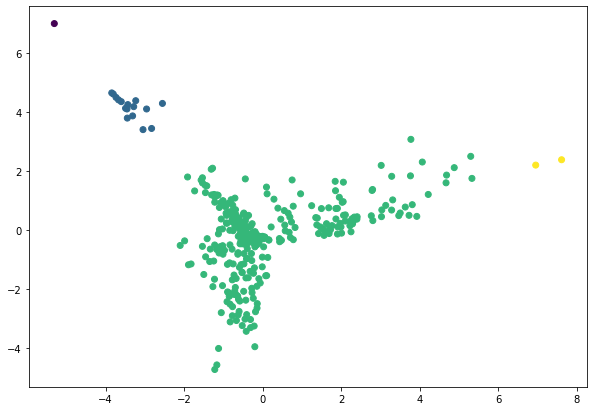

In [ ]:
pred = DBSCAN(eps=1.6, min_samples=2).fit_predict(X_reduced)

plt.figure(figsize = (10,7))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=pred)
plt.show()

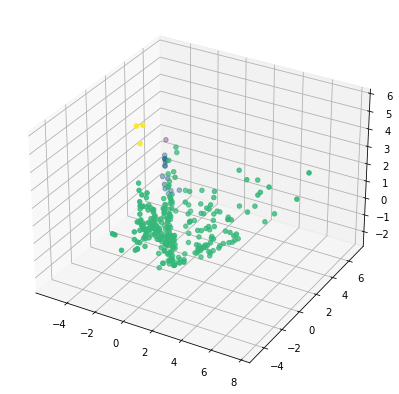

In [ ]:
pca = PCA (n_components=3)
X_reduced = pca.fit_transform(X_scale)

pred = DBSCAN(eps=1.9, min_samples=2).fit_predict(X_reduced)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection="3d")
x,y,z = [X_reduced[:,i] for i in range(3)]
ax.scatter(x,y,z, c=pred)
plt.show()

In [ ]:
df_group['anomaly']=pred

In [ ]:
df_group[df_group['anomaly']!=1]

id_own      volume_x                             Late Night  \
        count          mean     min      max        sum        sum   
id_ves                                                               
1283.0     48   3694.562500    22.0  23620.0   177339.0        9.0   
1287.0     30   3794.433333  1044.0   6459.0   113833.0        0.0   
1317.0     50   2875.660000     6.0  18637.0   143783.0       18.0   
1351.0     16  29356.000000  7665.0  40851.0   469696.0        0.0   
1367.0      7   6176.142857  4455.0   7815.0    43233.0        0.0   
1404.0    727   6475.782669    24.0  50801.0  4707894.0        0.0   
1406.0      6   3992.500000   963.0   6694.0    23955.0        0.0   
1411.0    562   2886.738434    21.0  41409.0  1622347.0        0.0   
1456.0     28   6712.500000   180.0  30370.0   187950.0        0.0   
1494.0    159   5892.729560     1.0  52754.0   936944.0        0.0   
1527.0    189  11091.052910    30.0  87348.0  2096209.0        0.0   
1535.0     31   4975.354839   125.0  23114.0   154236.0        6.0   
1536.0      9  19331.888889   270.0  54420.0   173987.0        0.0   
1543.0     24   4642.333333   295.0  13968.0   111416.0        0.0   
1553.0     45   3733.777778    41.0  29078.0   168020.0       10.0   
1569.0     44   4472.590909     5.0  32695.0   196794.0       13.0   
1579.0     50   3445.060000    44.0  21713.0   172253.0       19.0   
1599.0     48   3576.791667    43.0  27440.0   171686.0       14.0   
1610.0    600   4793.900000     6.0  44181.0  2876340.0        0.0   
1652.0     77   4484.428571    34.0  37939.0   345301.0        0.0   

       Early Morning Morning   Noon Eve Night date_delta                 \
                 sum     sum    sum sum   sum       mean median min max   
id_ves                                                                    
1283.0           0.0     7.0    0.0   0    32  17.000000   23.0   0  23   
1287.0           0.0     0.0    2.0  27     1  15.900000   19.0   0  21   
1317.0           0.0     6.0    0.0   0    26  13.420000   23.0   0  23   
1351.0           0.0    15.0    1.0   0     0  11.125000   11.0  10  13   
1367.0           0.0     7.0    0.0   0     0  11.000000   11.0  10  12   
1404.0           7.0    95.0  591.0  34     0   3.359010    0.0   0  16   
1406.0           0.0     6.0    0.0   0     0  11.166667   11.0  11  12   
1411.0           6.0    46.0  483.0  27     0   5.355872    0.0   0  17   
1456.0           0.0     0.0    0.0  28     0  18.000000   18.0  17  19   
1494.0           0.0   138.0   14.0   7     0  11.289308   11.0  10  17   
1527.0           0.0   183.0    6.0   0     0  10.867725   11.0   9  14   
1535.0           0.0     2.0    3.0   0    20  16.903226   23.0   0  23   
1536.0           0.0     9.0    0.0   0     0  11.666667   12.0  11  12   
1543.0           0.0     2.0    0.0  22     0  10.875000   18.0   0  20   
1553.0           0.0     3.0    5.0   0    27  16.000000   23.0   0  23   
1569.0           0.0     5.0    0.0   0    26  14.909091   23.0   0  23   
1579.0           0.0     5.0    0.0   0    26  13.200000   23.0   0  23   
1599.0           0.0     0.0    5.0   0    29  15.354167   23.0   0  23   
1610.0           8.0    37.0  492.0  63     0   4.358333    0.0   0  17   
1652.0           0.0    73.0    4.0   0     0  11.220779   11.0  10  14   

       anomaly  
                
id_ves          
1283.0       0  
1287.0       0  
1317.0       0  
1351.0       0  
1367.0       0  
1404.0       2  
1406.0       0  
1411.0       2  
1456.0      -1  
1494.0       0  
1527.0       0  
1535.0       0  
1536.0       0  
1543.0       0  
1553.0       0  
1569.0       0  
1579.0       0  
1599.0       0  
1610.0       2  
1652.0       0